Before getting started with this workshop, please create a new environment and install the following libraries: matplotlib, pandas, numpy, scikit-learn, and scipy.

We first import [**matplotlib**](https://matplotlib.org/), one of the most popular libraries for graphing in Python, as we will need to visualize data in this tutorial.

In [ ]:
import matplotlib.pyplot as plt         
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg") # display as Scalable Vector Graphics for higher quality plots

# 1. Data

We will go thourgh the machine learning pipeline with a relatively simple dataset called the [Diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). The dataset includes information about 422 diabetes patients; for each patient, we have ten baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. The response of interest, which is a quantitative measure of disease progression one year after the baseline, is treated as the target that we want to predict. We include with this notebook 2 files: `diabetes_data.csv` containing the features, and `diabetes_target.csv` containing the targets.

In the following sections, we will look into storing and manipulating this data for machine learning.

## 1.1. pandas

There are multiple libraries for working with data in Python; one of the most popular is [**pandas**](https://pandas.pydata.org/docs/index.html), an open-source tool designed for presenting two-dimensional, size-mutable, potentially heterogeneous tabular data (e.g., a `csv` format file). We first import pandas into our environment.

In [ ]:
import pandas as pd

### Loading data
In pandas, data is stored in a [`pd.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). To load `csv` data, we use [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
diabetes_data = pd.read_csv("diabetes_data.csv")
diabetes_target = pd.read_csv("diabetes_target.csv")
print(f"Data type: {type(diabetes_data)}")
diabetes_data

Data type: <class 'pandas.core.frame.DataFrame'>


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


### Manipulating data
Here we introduce simple operations that can be useful for your final projects.

**_(a) Column selection._** First, to select specific columns in a DataFrame, we can use square brackets, in which we provide a list of columns that we want as strings (or only one string if we want one column). For example, if we want only the patients' age, sex, and BMI:

In [ ]:
diabetes_small = diabetes_data[["age", "sex", "bmi"]]
diabetes_small.head(5) # use pd.DataFrame.head() to see only the top rows

,age,sex,bmi
0,59.0,2.0,32.1
1,48.0,1.0,21.6
2,72.0,2.0,30.5
3,24.0,1.0,25.3
4,50.0,1.0,23.0


**_(b) Change format._** To change the format of our DataFrame, we can use `pd.DataFrame.astype()`. For example, to convert the above DataFrame into integers:

In [ ]:
print(f"Data type before astype(): {diabetes_small.dtypes}")
diabetes_small = diabetes_small.astype(int)
print(f"Data type after astype(): {diabetes_small.dtypes}")
diabetes_small.head(5)

Data type before astype(): age    float64
sex    float64
bmi    float64
dtype: object
Data type after astype(): age    int32
sex    int32
bmi    int32
dtype: object


,age,sex,bmi
0,59,2,32
1,48,1,21
2,72,2,30
3,24,1,25
4,50,1,23


**_(c) Converting categorical strings to numeric values._** Let's say we had, instead of numbers, strings that represented the patients' sex. To convert these into numbers for ease of computation, we convert the DataFrame into the `category` type and use `pd.DataFrame.cat.codes`.

In [ ]:
sex = diabetes_small["sex"].map(lambda x: "male" if x == 1 else "female")
sex.head(5)

0    female
1      male
2    female
3      male
4      male
Name: sex, dtype: object

In [ ]:
sex = sex.astype("category").cat.codes
sex.head(5)

0    0
1    1
2    0
3    1
4    1
dtype: int8

**_(d) Joining DataFrames._** To join DataFrames together, we use [`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) or [`pd.DataFrame.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) if there are common columns between the DataFrames.

In [ ]:
all_data = pd.concat([diabetes_data, diabetes_target], axis=1)
all_data.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


**_(e) Plot data._** Lastly, pandas provides a few built-in functions built on top of matplotlib by default to plot your data. For example, to plot the patients' age in a histogram with 10 bins:

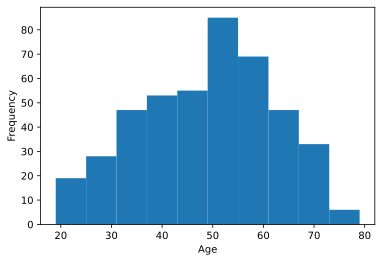

In [ ]:
diabetes_data["age"].plot.hist(bins=10)
plt.xlabel("Age")
plt.show()

## 1.2. numpy

`pd.DataFrame` is good for data analysis due to its clear presentation and convenient built-in functions; however, it is not optimal for direct utilization in machine learning models. For mathematical convenience, we instead use an [`np.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) as part of [**numpy**](https://numpy.org/), a library for efficient computational operations. We recommend this [tutorial](https://cs231n.github.io/python-numpy-tutorial/) for those not yet familiar with the library. We load our data from comma-separated `csv` files with [`np.loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) with `skiprows=1` to ignore the header.

In [ ]:
import numpy as np

diabetes_data = np.loadtxt("diabetes_data.csv", delimiter=",", skiprows=1)
diabetes_target = np.loadtxt("diabetes_target.csv", delimiter=",", skiprows=1)
diabetes_data

array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
       [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
       [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
       [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
       [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]])

To check the dimensions of our data, we use [`np.ndarray.shape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html).

In [ ]:
print(f"Data shape: {diabetes_data.shape}")
print(f"Target shape: {diabetes_target.shape}")

Data shape: (442, 10)
Target shape: (442,)


### Slicing

You can slice a numpy array by using the colon operator along the desire axes, like in Python. For example, to obtain the first 10 rows in the second column of our data:

In [ ]:
diabetes_data[:10, 1]

array([2., 1., 2., 1., 1., 1., 2., 2., 2., 1.])

# 2. Machine Learning

## 2.1. SciPy

[**SciPy**](https://scipy.org/) is a library which provides efficient algorithms and data structures for scientific computing, including but not limited to: statistics, differential equations, integration, [optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html), etc. For example, `scipy.stats` contains a large selection of probability distributions, summary statistics, statistical tests, and more. Let's plot a normal/Gaussian distribution using [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm):

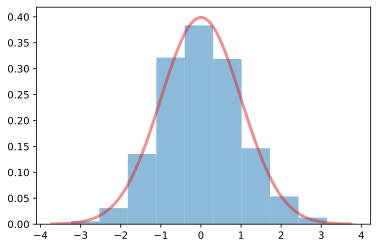

In [ ]:
from scipy.stats import norm

fig, ax = plt.subplots(1, 1)
r = norm.rvs(size=1000, random_state=42) # sample 1000 normal random variables
ax.hist(r, density=True, alpha=0.5)
x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 100)
ax.plot(x, norm.pdf(x), "-", alpha=0.5, linewidth=3, label="norm pdf", c="tab:red") # plot the normal pdf
plt.show()

## 2.2. scikit-learn

[**scikit-learn**](https://scikit-learn.org/stable/) (or **sklearn**) is an open-source, easy-to-use, and efficient toolbox for machine learning. The diabetes dataset is included as one of the [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) in scikit-learn, which can be used to illustrate the behaviors of scikit-learn algorithms; however, they are often too small to be utilized in real-world machine learning problems. We will be loading the diabeties dataset with [`sklearn.datasets.load_diabetes()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes), setting `as_frame=True` if we want a `pd.DataFrame` and `False` if we want a numpy array.

Notice that each of these 10 feature variables has been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

In [ ]:
from sklearn import datasets

diabetes_data, diabetes_target = datasets.load_diabetes(return_X_y=True, as_frame=False)
diabetes_data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

### (a) Linear Regression

Before training a model, we need to split our data into a <u>training set</u> and a <u>test set</u>. Because we want our model to have some ability to generalize, we will train the model on the training set and test the performance of our model on the test set. Our goal is to obtain a model that can estimate the target value using the input features. 

We can directly use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from scikit-learn to split the dataset into training set and test set. Keep the parameter `shuffle` to `True` if you want the function to automatically shuffle the samples for you during the spliting. A fixed `random_state` can make sure that your dataset is shuffled in the same way each time you invoke `train_test_split`. Here, we want 80% of our data to be training data and 20% test; therefore, we set `test_size=0.2`.

In [ ]:
from sklearn.model_selection import train_test_split

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_data,
                                                                                        diabetes_target,
                                                                                        test_size=0.2,
                                                                                        shuffle=True,
                                                                                        random_state=42)
diabetes_X_test.shape

(89, 10)

For ease of visualization, we only use one feature from the feature set to train the model. We use `np.newaxis` to increase the dimensions of our training data by 1 in order to have a set of features per row that corresponds to each training example. For instance, if we want only to use the third feature (BMI) for this task:

In [ ]:
diabetes_X_train[:, 2, np.newaxis].shape

(353, 1)

Now we want to train a model to predict the targets given the data. We first initialize a [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model, setting `fit_intercept=True` (it is `True` by default) to add a bias value. We also set `n_jobs=4` for faster training, although our dataset is small enough that the difference is negligible.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True, n_jobs=4)

Then we train the model using the training data that we just obtained. For now, we only use one feature to train the models, even if we have ten features in total.

In [ ]:
selected_feature = 2
selected_diabetes_X_train = diabetes_X_train[:, selected_feature, np.newaxis]
selected_diabetes_X_test = diabetes_X_test[:, selected_feature, np.newaxis]
lin_reg.fit(selected_diabetes_X_train, diabetes_y_train)

LinearRegression(n_jobs=4)

After training the model, we use our model on the test set.

In [ ]:
diabetes_y_pred = lin_reg.predict(selected_diabetes_X_test)

To examine how good our model did on the test set, we need a way to evaluate it. For example, we can use the **Mean Square Error (MSE)** to achieve this goal. Suppose that $y_i$ is the true value of the $i^{\text{th}}$ sample, and $\hat{y}_i$ is the corresponding predicted value; the MSE estimated over $n$ samples is then defined as:

$$
\text{MSE} (y, \hat{y}) = \frac{1}{n}\sum_{i=0}^{n - 1} \left(y_i - \hat{y}_i\right)^2
$$

In scikit-learn, the estimation can be achieved by using [`mean_square_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(diabetes_y_test, diabetes_y_pred)

4061.825928494928

However, this might not be straightforward enough; instead, we can visualize the predicted results using [`matplotlib`](https://matplotlib.org/).

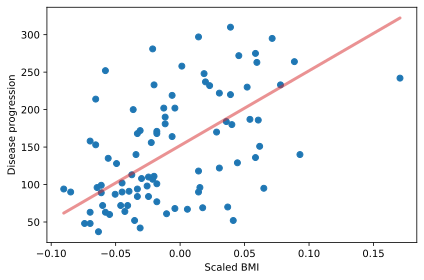

In [ ]:
plt.scatter(selected_diabetes_X_test, diabetes_y_test, color="tab:blue") # plot data points
plt.plot(selected_diabetes_X_test, diabetes_y_pred, color="tab:red", linewidth=3, alpha=0.5) # plot fitted line
plt.xlabel("Scaled BMI")
plt.ylabel("Disease progression")
plt.tight_layout()
plt.show()

If we use all the features in the training data:

In [ ]:
lin_reg.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = lin_reg.predict(diabetes_X_test)
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2900.1732878832318

In this case, it seems that using more features is beneficial for the model performance. However, in some other scenarios, using more features does not guarantee better performance. You will have the chance to explore this more when you work on your course project.

#### Regularization

You can also experiment with regularization in fitting your linear regression models. For example, you can try out the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) or [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) model, which uses $L_1$ and $L_2$ regularization, respectively. Let's try $L_2$ regularization with only the third feature of our dataset:

Mean squared error: 3935.198006663338


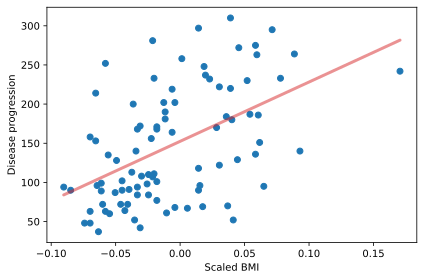

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(fit_intercept=True, alpha=0.25)
ridge.fit(selected_diabetes_X_train, diabetes_y_train)
diabetes_y_pred = ridge.predict(selected_diabetes_X_test)
print(f"Mean squared error: {mean_squared_error(diabetes_y_test, diabetes_y_pred)}")

plt.scatter(selected_diabetes_X_test, diabetes_y_test, color="tab:blue")
plt.plot(selected_diabetes_X_test, diabetes_y_pred, color="tab:red", linewidth=3, alpha=0.5)
plt.xlabel("Scaled BMI")
plt.ylabel("Disease progression")
plt.tight_layout()
plt.show()

#### Linear Regression with a Basis Function

Remember that the linear regression model is a linear function of the parameters, and we can extend this model by utilizing nonlinear functions of our input variables. For example, we can experiment with Gaussian basis functions for our data, which are of the form:

$$
    \phi_j(\mathbf{x}) = \exp \left\{ -\frac{\left(\mathbf{x} - \mu_j\right)^2}{2s^2}\right\} = \exp \left\{ -0.5 \left(\frac{\mathbf{x} - \mu_j}{s}\right)^2 \right\}
$$

where the $\mu_j$ are the centers of the basis functions in input space, and $s$ governs the functions' spatial scale (Chapter 3.1).

There are no built-in Gaussian basis functions in scikit-learn, but we can write our own custom [**transformer**](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer) class (as in _transforming_ our input features) to create them. A transformer class contains a `fit` function, where some parameters are learn from `X` and `y`, and a `transform` function, where `X` will be transformed using the aforementioned parameters. A transformer should inherit both `BaseEstimator`, which allows for hyperparameter tuning, and `TransformerMixin`, which implements a `fit_transform` function without explicit declaration.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianBasis(BaseEstimator, TransformerMixin):
    def __init__(self, N):
        self.N = N # number of basis functions
    
    @staticmethod
    def _gaussian_basis(x, mu, s, axis=None):
        arg = (x - mu) / s
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        self.mus = np.linspace(X.min(), X.max(), self.N) # evenly space centers: self.N points between X.min() and X.max()
        self.s = self.mus[1] - self.mus[0] # width between 2 consecutive centers
        return self
        
    def transform(self, X):
        return self._gaussian_basis(X[:, :, np.newaxis], self.mus, self.s, axis=1)

In order to make use of our Gaussian transformer class, we can utilize a scikit-learn [pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline), which chains together a series of estimators/transformers.

Mean squared error: 4130.36435781712


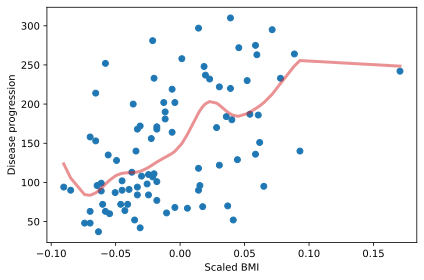

In [ ]:
from sklearn.pipeline import make_pipeline

gaussian_model = make_pipeline(GaussianBasis(20), Ridge())
gaussian_model.fit(selected_diabetes_X_train, diabetes_y_train)

# Unsorted for MSE evaluation
diabetes_y_pred = gaussian_model.predict(selected_diabetes_X_test)
print(f"Mean squared error: {mean_squared_error(diabetes_y_test, diabetes_y_pred)}")

# Sorted for visualization
diabetes_X_test_sorted = selected_diabetes_X_test[selected_diabetes_X_test[:, 0].argsort()]
diabetes_y_pred_sorted = gaussian_model.predict(diabetes_X_test_sorted)

plt.scatter(selected_diabetes_X_test, diabetes_y_test, color="tab:blue")
plt.plot(diabetes_X_test_sorted, diabetes_y_pred_sorted, color="tab:red", linewidth=3, alpha=0.5)
plt.xlabel("Scaled BMI")
plt.ylabel("Disease progression")
plt.tight_layout()
plt.show()

You can experiment with other basis functions as well. Gaussian basis functions are not always optimal (as shown above), but they work well when you have intuitions about your data that point toward them. For example, a sine curve with noise:

Mean squared error: 0.006982421229639428


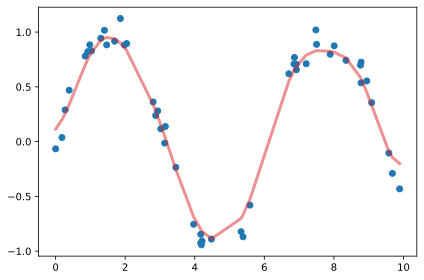

In [ ]:
generator = np.random.RandomState(1)
X = 10 * generator.rand(50)
y = np.sin(X) + 0.1 * generator.normal(0, 1, 50)
gaussian_model = make_pipeline(GaussianBasis(20), Ridge())
gaussian_model.fit(X[:, np.newaxis], y)

# Unsorted for MSE evaluation
y_pred = gaussian_model.predict(X[:, np.newaxis])
y_true = np.sin(X)
print(f"Mean squared error: {mean_squared_error(y_true, y_pred)}")

# Sorted for visualization
X_sorted = np.sort(X)
y_pred_sorted = gaussian_model.predict(X_sorted[:, np.newaxis])

plt.scatter(X, y, color="tab:blue")
plt.plot(X_sorted, y_pred_sorted, color="tab:red", linewidth=3, alpha=0.5)
plt.tight_layout()
plt.show()

### (b) Logistic Regression

To perform logistic regression, we will need to load a dataset with discrete labels. For this section, we will be working with the [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset), also available as a toy dataset provided by scikit-learn. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. There are 4 features: sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm.

In [ ]:
iris_data, iris_target = datasets.load_iris(return_X_y=True)
print(f"Dataset shape: {iris_data.shape}")
print(f"Target shape: {iris_target.shape}")

Dataset shape: (150, 4)
Target shape: (150,)


To visualize the data, let's use the first 2 features:

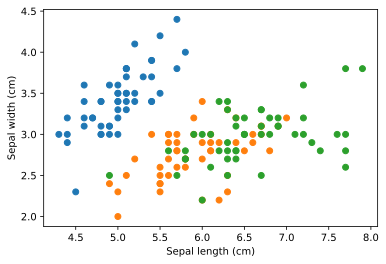

In [ ]:
colors = ["tab:blue", "tab:orange", "tab:green"]
features_text = ["Sepal length (cm)", "Sepal width (cm)", "Petal length (cm)", "Petal width (cm)"]
feature1, feature2 = 0, 1
plt.scatter(iris_data[:, feature1], iris_data[:, feature2], color=[colors[y] for y in iris_target])
plt.xlabel(features_text[feature1])
plt.ylabel(features_text[feature2])
plt.show()

We can see from the graph that our features have not been scaled/normalized. Thus, we want to do so using [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), which will remove the mean and bring the standard deviation to 1:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_data = scaler.fit_transform(iris_data)
iris_data[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

Again, we need to split our data into train and test sets using `train_test_split`. Here, we add a `stratify` argument so that we have similar percentages of each label in our train and test sets.

In [ ]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_data,
                                                                        iris_target,
                                                                        test_size=0.2,
                                                                        shuffle=True,
                                                                        stratify=iris_target,
                                                                        random_state=42)
train_labels, train_counts = np.unique(iris_y_train, return_counts=True)
test_labels, test_counts = np.unique(iris_y_test, return_counts=True)
print(f"Train set label percentages: {train_labels}: {train_counts/iris_y_train.shape[0]}")
print(f"Test set label percentages: {test_labels}: {test_counts/iris_y_test.shape[0]}")

Train set label percentages: [0 1 2]: [0.33333333 0.33333333 0.33333333]
Test set label percentages: [0 1 2]: [0.33333333 0.33333333 0.33333333]


We perform logistic regression by using [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and examine our model's accuracy with the `score` function on the test set.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(iris_X_train, iris_y_train)
print(f"Accuracy: {log_reg.score(iris_X_test, iris_y_test)}")

Accuracy: 0.9333333333333333


#### Further Evaluation

We can further investigate our model's performance by taking a look at the confusion matrix. Here, the rows represent the ground truth values while the columns our model's predictions.

In [ ]:
from sklearn.metrics import confusion_matrix

iris_y_test_pred = log_reg.predict(iris_X_test)
print(confusion_matrix(iris_y_test, iris_y_test_pred))

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


The confusion matrix is shown below, where **0**, **1**, and **2** represent our classes, "T" stands for ground truth, and "P" stands for prediction.

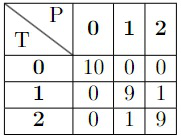

In [ ]:
from PIL import Image

image = Image.open("confusion_matrix.jpg")
display(image)

We can also see other evaluation metrics—such as precision, recall, and F1-score—with [`sklearn.metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report).

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(iris_y_test, iris_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### Cross Validation

We can further evaluate our model by employing cross validation (CV), of which a basic method is **$k$-Fold CV**. In $k$-Fold CV, our dataset is divided into $k$ non-overlapping parts, or "folds." Each fold is then used as a held-out validation set once, while the remaining folds act as our training set. The final result of our cross validation is then the mean performance of all $k$ models.

scikit-learn also provides easy-to-use classes and functions for $k$-Fold CV. We first import [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and employ it on our training data, setting $k$ equal to 10 (or `n_splits=10`).

In [ ]:
from sklearn.model_selection import KFold

kfold_cv = KFold(n_splits=10, random_state=42, shuffle=True)
for index, (train_index, val_index) in enumerate(kfold_cv.split(iris_X_train)):
    print(f"Fold {index + 1} indices: {val_index}")

Fold 1 indices: [  4  10  18  26  40  44  47  55  62  64  73 107]
Fold 2 indices: [  0  11  31  36  45  65  70  88  89  91 104 109]
Fold 3 indices: [ 12  15  22  24  42  56  76  78  96  97 110 114]
Fold 4 indices: [  5   9  25  28  30  33  53  69  85  90  98 118]
Fold 5 indices: [  7  16  34  35  39  43  49  66  67  68  72 113]
Fold 6 indices: [  3   8  13  17  19  27  38  83  84  95 100 117]
Fold 7 indices: [  6  46  50  54  61  77  79  80  81  94 111 116]
Fold 8 indices: [ 32  41  48  57  58  59  63  75  93 101 105 112]
Fold 9 indices: [  1   2  21  23  29  37  52  87  99 103 108 115]
Fold 10 indices: [ 14  20  51  60  71  74  82  86  92 102 106 119]


To examine the $k$-fold cross validation scores, we utilize [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), passing the above `KFold` object as the `cv` argument.

In [ ]:
from sklearn.model_selection import cross_val_score

log_reg_cv = LogisticRegression()
scores = cross_val_score(log_reg_cv, iris_X_train, iris_y_train, scoring="accuracy", cv=kfold_cv)
print(scores)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

[0.91666667 1.         1.         1.         0.83333333 1.
 1.         1.         0.91666667 1.        ]
Mean accuracy: 0.9666666666666666
Standard deviation: 0.055277079839256664


# 3. Different Data Types & Vectorization

Different tasks naturally come with different data types. It is thus important for us to vectorize the input data, since computers do not usually recognize these samples in their original formats.

## 3.1. Images

In the case of images, each input sample can be viewed as a 2-dimensional array, if we use its grayscale values for representation. For example, in the [Digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) made up of 1,797 8x8 images:

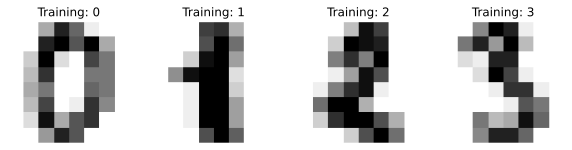

In [ ]:
digits = datasets.load_digits()

# Visualize images in dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

In order to utilize this dataset, we can reshape each sample's grayscale values into a vector, a format that our model can recognize:

In [ ]:
print(image.reshape(-1))
print(f"Vector length: {len(image.reshape(-1))}")

[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
Vector length: 64


We can then further preprocess these values or directly use them like we did the numeric values in sections 1 and 2.

## 3.2. Text

Suppose we have the following corpus and we want to vectorize the sentences in it:

In [ ]:
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

One way to do so is to vectorize these sentences into "one-hot" vectors. One-hot encoding creates a matrix $\mathbf{X}$ where $\mathbf{X}_{ij}$ represents the occurrence of word $j$ in document $i$. Each row then becomes a vectorized representation of a document. See [Bag-of-words model](https://en.wikipedia.org/wiki/Bag-of-words_model) for more details on one-hot vectors in the linguistic setting.

We use [`sklearn.feature_extraction.text.CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for one-hot encoding in scikit-learn. Notice that the vectorizer has already carried out some light preprocessing on our data (convert to lowercase and strip accents).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=False)
X = vectorizer.fit_transform(corpus)
sorted_feature_indices = [word for word, _ in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])]
print(f"Feature indices: {[(index, word) for index, word in enumerate(sorted_feature_indices)]}")
print(X.toarray())
print(f"Word count: {X.sum(axis=0)}")

Feature indices: [(0, 'and'), (1, 'document'), (2, 'first'), (3, 'is'), (4, 'one'), (5, 'second'), (6, 'the'), (7, 'third'), (8, 'this')]
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Word count: [[1 4 2 4 1 1 4 1 4]]


This is obviously a very naïve way of vectorization for a few reasons. For example, the order of the words in a document is not recorded; therefore, context is completely ignored. You can check out other methods to vectorize text, e.g., [`TfIdfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer), which does not solve the context problem but is a slightly less naïve vectorization method.

# 4. _Optional_: Other Models for Classification

In this section, we will generate a new dataset and examine the performance of different models on it. We will use [`sklearn.datasets.make_circles`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), which create a large circle that contains a smaller circle; we can use this as a toy dataset to understand the performance of different models.

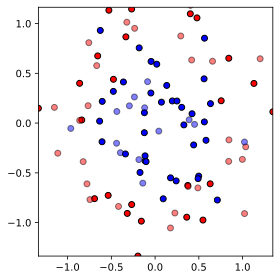

In [ ]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap

# Setting color map for visualization
cm = plt.cm.RdBu # red and blue
cm_bright = ListedColormap(["#FF0000", "#0000FF"]) # bright red and blue

# Generate circle data with sklearn.datasets.make_circles
cir_X, cir_y = make_circles(noise=0.2, factor=0.5, random_state=42)
cir_X_train, cir_X_test, cir_y_train, cir_y_test = train_test_split(cir_X, cir_y, test_size=0.4, random_state=42)

# Create mesh grid
x_min, x_max = cir_X[:, 0].min(), cir_X[:, 0].max()
y_min, y_max = cir_X[:, 1].min(), cir_X[:, 1].max()
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k") # train samples
ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.5, edgecolors="k") # opaque test samples
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.tight_layout()
plt.show()

Here we are going to experiment with three different classifiers for this task:

- Linear Support Vector Machine (SVM)
- Radial Basis Function (RBF) kernel SVM
- Multi-layer Perceptron (MLP)

Note that our focus is not on the algorithms, but on the process of utilizing these methods. For more details about practical use of SVM, you can check out this [official tutorial](https://scikit-learn.org/stable/modules/svm.html) provided by scikit-learn.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

lsvc = SVC(kernel="linear", C=0.025, random_state=42)
rbfsvc = SVC(kernel="rbf", gamma=2, C=1, random_state=42)
mlp = MLPClassifier(alpha=1, max_iter=1000)

## 4.1. Classification with Linear SVM
Learn more about the usage of SVM in scikit-learn [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

Accuracy for Linear SVM: 0.35.
Test set label percentages: [0 1]: [0.65 0.35]


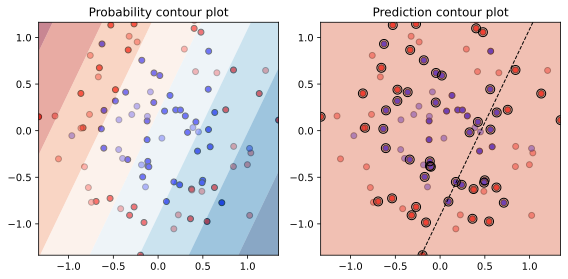

In [ ]:
# Plot the dataset first
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
for ax in [ax1, ax2]:
    ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.5, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Train Linear SVM
lsvc.fit(cir_X_train, cir_y_train)
score = lsvc.score(cir_X_test, cir_y_test) # Return the mean accuracy
print(f"Accuracy for Linear SVM: {score}.")
test_labels, test_counts = np.unique(cir_y_test, return_counts=True)
print(f"Test set label percentages: {test_labels}: {test_counts/cir_y_test.shape[0]}")

Z = lsvc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_pred = lsvc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z_pred = Z_pred.reshape(xx.shape)
ax1.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
ax2.contourf(xx, yy, Z_pred, cmap=cm, alpha=0.5)

# Support vector outlines
ax2.scatter(lsvc.support_vectors_[:, 0], lsvc.support_vectors_[:, 1], s=80, facecolors="none", zorder=10, edgecolors="k")

# Decision hyperplanes
ax2.contour(xx, yy, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-1, 0, 1], linewidths=[1, 1.5, 1])

ax1.set_title("Probability contour plot")
ax2.set_title("Prediction contour plot")

plt.tight_layout()
plt.show()

Adding the decision boundary to the plot:

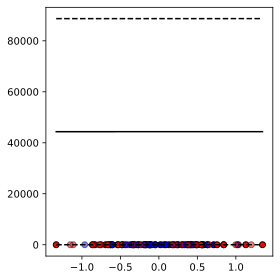

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k")
ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.5, edgecolors="k")

# Get the separating hyperplane
w = lsvc.coef_[0]
b = lsvc.intercept_[0]
a = -w[0] / w[1]
hp_x = np.linspace(xx.min(), xx.max())
hp_y = a * hp_x - b / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors, sqrt(1+a^2) away vertically
margin = 1 / np.sqrt(np.sum(w ** 2))
hp_y_down = hp_y - np.sqrt(1 + a ** 2) * margin
hp_y_up = hp_y + np.sqrt(1 + a ** 2) * margin

plt.plot(hp_x, hp_y, "k-")
plt.plot(hp_x, hp_y_down, "k--")
plt.plot(hp_x, hp_y_up, "k--")

plt.tight_layout()
plt.show()

We obviously see that Linear SVM does not work well for this particular dataset.

## 4.2. Classification with RBF-Kernel SVM

Accuracy for RBF-kernel SVM: 0.775.


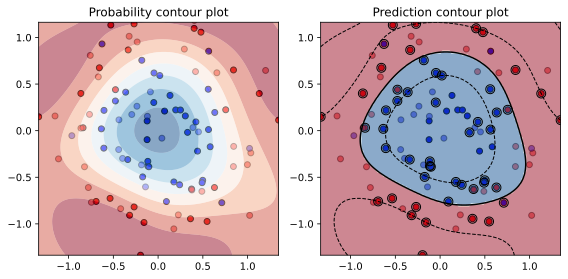

In [ ]:
# Plot the dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
for ax in [ax1, ax2]:
    ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.5, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Train RBF-Kernel SVM
rbfsvc.fit(cir_X_train, cir_y_train)
score = rbfsvc.score(cir_X_test, cir_y_test) # Return the mean accuracy
print(f"Accuracy for RBF-kernel SVM: {score}.")
Z = rbfsvc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_pred = rbfsvc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z_pred = Z_pred.reshape(xx.shape)
ax1.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
ax2.contourf(xx, yy, Z_pred, cmap=cm, alpha=0.5)

# Support vector outlines
ax2.scatter(lsvc.support_vectors_[:, 0], lsvc.support_vectors_[:, 1], s=80, facecolors="none", zorder=10, edgecolors="k")

# Decision hyperplanes
ax2.contour(xx, yy, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-1, 0, 1], linewidths=[1, 1.5, 1])

ax1.set_title("Probability contour plot")
ax2.set_title("Prediction contour plot")

plt.tight_layout()
plt.show()

## 4.3 Classification with MLP
Learn more about the usage of MLP in scikit-learn [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). The theoritical details will be covered in class later this semester. 

Accuracy for MLP: 0.675.


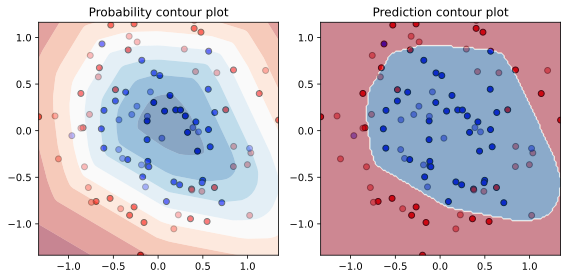

In [ ]:
# Plot the dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
for ax in [ax1, ax2]:
    ax.scatter(cir_X_train[:, 0], cir_X_train[:, 1], c=cir_y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(cir_X_test[:, 0], cir_X_test[:, 1], c=cir_y_test, cmap=cm_bright, alpha=0.5, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Train MLP
mlp.fit(cir_X_train, cir_y_train)
score = mlp.score(cir_X_test, cir_y_test) # Return the mean accuracy
print(f"Accuracy for MLP: {score}.")
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_pred = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z_pred = Z_pred.reshape(xx.shape)
ax1.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
ax2.contourf(xx, yy, Z_pred, cmap=cm, alpha=0.5)

ax1.set_title("Probability contour plot")
ax2.set_title("Prediction contour plot")

plt.tight_layout()
plt.show()